In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [2]:
file_path = '/content/EWS.csv'
data = pd.read_csv(file_path)

In [3]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Y            0
Data         0
XAU BGNL     0
ECSURPUS     0
BDIY         0
CRY          0
DXY          0
JPY          0
GBP          0
Cl1          0
VIX          0
USGG30YR     0
GT10         0
USGG2YR      0
USGG3M       0
US0001M      0
GTDEM30Y     0
GTDEM10Y     0
GTDEM2Y      0
EONIA        0
GTITL30YR    0
GTITL10YR    0
GTITL2YR     0
GTJPY30YR    0
GTJPY10YR    0
GTJPY2YR     0
GTGBP30Y     0
GTGBP20Y     0
GTGBP2Y      0
LUMSTRUU     0
LMBITR       0
LUACTRUU     0
LF98TRUU     0
LG30TRUU     0
LP01TREU     0
EMUSTRUU     0
LF94TRUU     0
MXUS         0
MXEU         0
MXJP         0
MXBR         0
MXRU         0
MXIN         0
MXCN         0
dtype: int64


In [4]:
# Basic statistics
print("\nDataset Statistics:\n", data.describe())


Dataset Statistics:
                  Y     XAU BGNL     ECSURPUS          BDIY          CRY  \
count  1111.000000  1111.000000  1111.000000   1111.000000  1111.000000   
mean      0.213321   987.463744     0.036153   2259.860486   245.247670   
std       0.409837   494.623740     0.349453   2017.811888    68.278066   
min       0.000000   256.680000    -0.974000    291.000000   106.293000   
25%       0.000000   433.740000    -0.191000    990.000000   184.705550   
50%       0.000000  1137.800000     0.035000   1518.000000   234.560000   
75%       0.000000  1324.825000     0.260500   2685.500000   301.539500   
max       1.000000  2006.910000     0.991000  11793.000000   467.570000   

               DXY          JPY          GBP          Cl1          VIX  ...  \
count  1111.000000  1111.000000  1111.000000  1111.000000  1111.000000  ...   
mean     90.934982   106.605734     1.569661    60.708101    19.992169  ...   
std      11.379095    12.840754     0.212344    25.900813     8.6

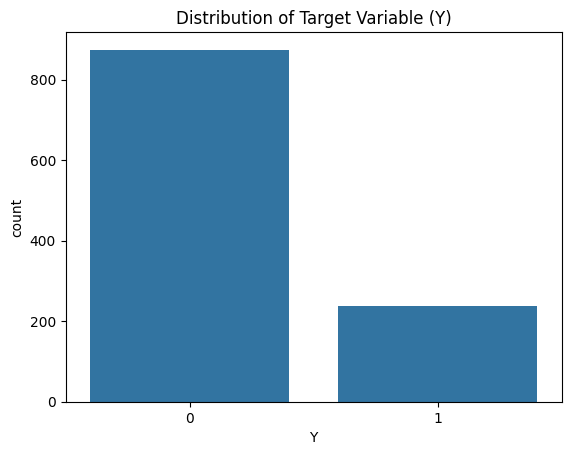

In [5]:
# Target variable distribution
sns.countplot(x='Y', data=data)
plt.title('Distribution of Target Variable (Y)')
plt.show()

In [6]:
# Convert 'Data' column to datetime and extract features
data['Data'] = pd.to_datetime(data['Data'])
data['Year'] = data['Data'].dt.year
data['Month'] = data['Data'].dt.month
data['Day'] = data['Data'].dt.day
data = data.drop(columns=['Data'])  # Drop the original 'Data' column

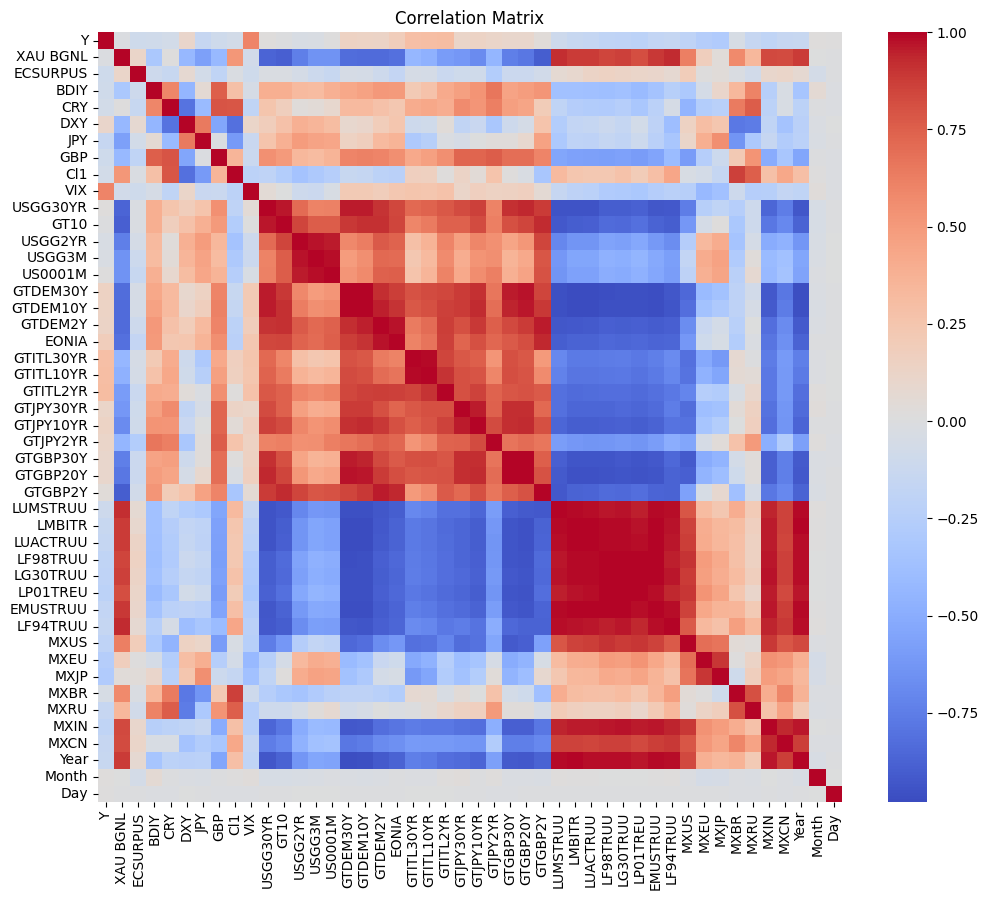

In [7]:
# Correlation matrix
plt.figure(figsize=(12, 10))
# Extract numerical features for correlation
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()


In [10]:
# Identify top correlated features with the target (Y)
target_corr = correlation_matrix['Y'].sort_values(ascending=False)
print("\nTop Correlated Features with Y:\n", target_corr.head(30))


Top Correlated Features with Y:
 Y            1.000000
VIX          0.598432
GTITL2YR     0.304528
GTITL10YR    0.297573
GTITL30YR    0.295000
EONIA        0.180311
GTDEM30Y     0.141537
GTDEM10Y     0.139933
GTJPY10YR    0.133660
GTDEM2Y      0.130607
GTJPY30YR    0.114555
GTJPY2YR     0.112314
DXY          0.103227
GTGBP20Y     0.100142
GTGBP30Y     0.099777
GTGBP2Y      0.035010
Month        0.020411
USGG30YR     0.019255
US0001M      0.015379
Day          0.012258
GT10        -0.004776
XAU BGNL    -0.011535
USGG3M      -0.025935
USGG2YR     -0.034909
MXBR        -0.043429
Cl1         -0.070141
CRY         -0.074102
BDIY        -0.083440
ECSURPUS    -0.090772
GBP         -0.093201
Name: Y, dtype: float64


In [269]:
data.dropna(inplace=True)

In [231]:
# Select a subset of features for modeling
selected_features = ['VIX','DXY','USGG3M']  # Update this based on correlation
X = data[selected_features]
y = data['Y']


In [232]:
# Split data chronologically (no shuffle)
train_size = int(0.5 * len(data))  # 50% training, 50% testing
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [233]:
# Step 3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [234]:
# Step 4: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [235]:
# Predictions and probabilities
y_pred = model.predict(X_test_scaled) # Ensure y_pred is generated using the same X_test_scaled used for evaluation
y_prob = model.predict_proba(X_test_scaled)[:, 1]
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       453
           1       0.81      0.33      0.47        92

    accuracy                           0.87       545
   macro avg       0.84      0.66      0.70       545
weighted avg       0.87      0.87      0.85       545



In [236]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]
# Adjust the dec1
threshold = 0.06
y_pred = (y_prob >= threshold).astype(int)



Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87       453
           1       0.42      0.65      0.51        92

    accuracy                           0.79       545
   macro avg       0.67      0.74      0.69       545
weighted avg       0.84      0.79      0.81       545


ROC-AUC Score: 0.8522410979940493


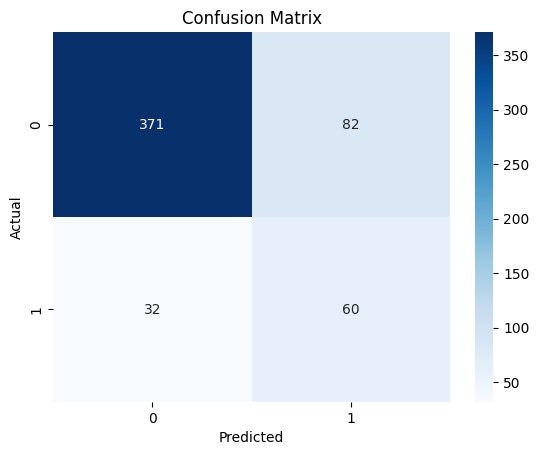

In [237]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score:", roc_auc)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [253]:
from imblearn.over_sampling import SMOTE

# Oversample the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Train Logistic Regression on the balanced data
model_balanced = LogisticRegression()
model_balanced.fit(X_train_balanced, y_train_balanced)

# Evaluate

y_prob_balanced = model_balanced.predict_proba(X_test_scaled)[:, 1]
threshold = 0.12
y_pred_balanced = (y_prob_balanced >= threshold).astype(int)
#y_pred_balanced = model_balanced.predict(X_test_scaled)
print("\nClassification Report (Balanced Model):\n", classification_report(y_test, y_pred_balanced))



Classification Report (Balanced Model):
               precision    recall  f1-score   support

           0       0.93      0.76      0.84       453
           1       0.38      0.72      0.50        92

    accuracy                           0.76       545
   macro avg       0.66      0.74      0.67       545
weighted avg       0.84      0.76      0.78       545



In [254]:
# Calculate ROC-AUC score
roc_auc_balanced = roc_auc_score(y_test, y_prob_balanced)
print("\nROC-AUC Score (Balanced Model):", roc_auc_balanced)



ROC-AUC Score (Balanced Model): 0.8533928400038391


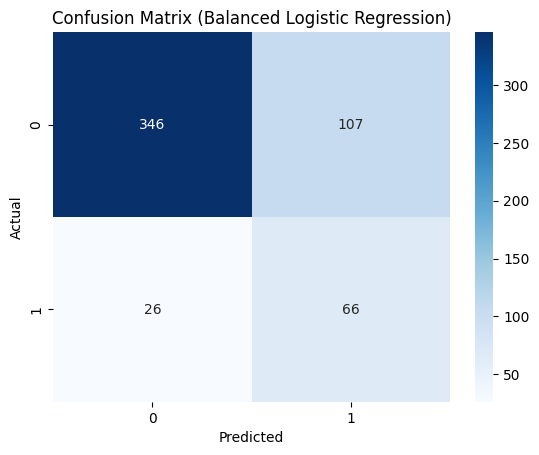

In [255]:
# Generate confusion matrix
cm_balanced = confusion_matrix(y_test, y_pred_balanced)

# Plot confusion matrix heatmap
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Balanced Logistic Regression)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [256]:
# Train XGBoost Model
from xgboost import XGBClassifier
xgb_model = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb_model.fit(X_train_scaled, y_train)

# Evaluate XGBoost Model

y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
#y_pred_xgb = xgb_model.predict(X_test_scaled)

threshold = 0.07
y_pred_xgb = (y_prob_xgb >= threshold).astype(int)
print("Classification Report (XGBoost):", classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score (XGBoost):", roc_auc_score(y_test, y_prob_xgb))

Classification Report (XGBoost):               precision    recall  f1-score   support

           0       0.90      0.90      0.90       453
           1       0.52      0.53      0.52        92

    accuracy                           0.84       545
   macro avg       0.71      0.72      0.71       545
weighted avg       0.84      0.84      0.84       545

ROC-AUC Score (XGBoost): 0.824035416066801


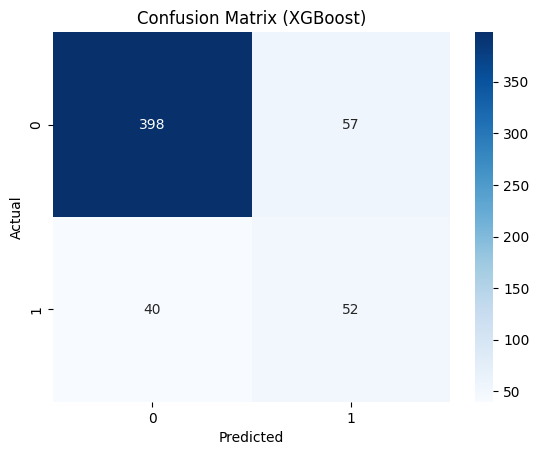

In [190]:
# Generate confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix heatmap
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (XGBoost)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [257]:
# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

# Perform Grid Search for Random Forest
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, scoring='roc_auc', cv=3)
grid_rf.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_rf.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


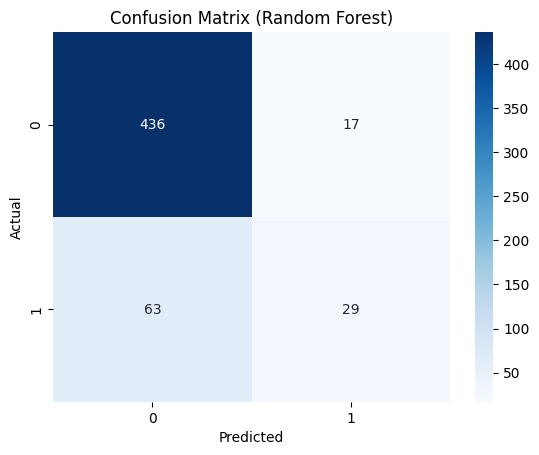

Classification Report (Random Forest):               precision    recall  f1-score   support

           0       0.87      0.96      0.92       453
           1       0.63      0.32      0.42        92

    accuracy                           0.85       545
   macro avg       0.75      0.64      0.67       545
weighted avg       0.83      0.85      0.83       545

ROC-AUC Score (Random Forest): 0.6993113542566465


In [258]:
# Evaluate Random Forest Model
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("Classification Report (Random Forest):", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score (Random Forest):", roc_auc_score(y_test, y_prob_rf))

In [259]:
# Train Isolation Forest for anomaly detection
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train_scaled)
model.fit(X_train_scaled, y_train)

# Evaluate Isolation Forest
iso_pred = iso_forest.predict(X_test_scaled)
# Map Isolation Forest output (-1 to anomaly, 1 to normal)
iso_pred = [0 if x == -1 else 1 for x in iso_pred]
print("Classification Report (Isolation Forest):", classification_report(y_test, iso_pred))


Classification Report (Isolation Forest):               precision    recall  f1-score   support

           0       0.78      0.12      0.21       453
           1       0.16      0.83      0.27        92

    accuracy                           0.24       545
   macro avg       0.47      0.47      0.24       545
weighted avg       0.67      0.24      0.22       545



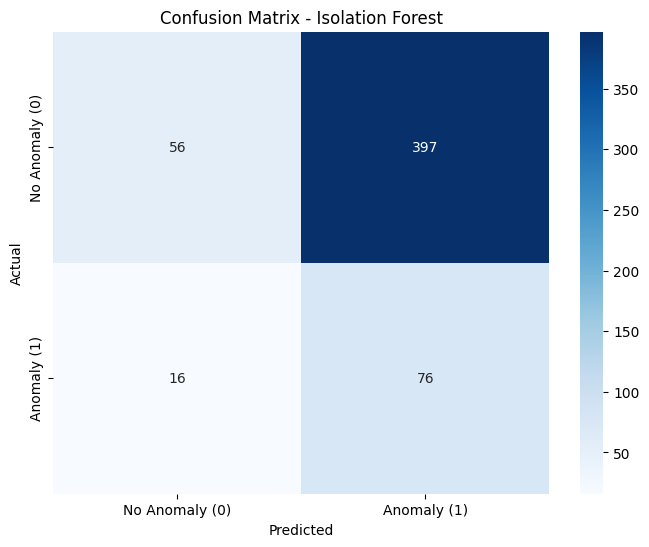

In [260]:
# Calculate confusion matrix
cm_iso = confusion_matrix(y_test, iso_pred, labels=[0, 1])

# Display confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_iso, annot=True, fmt='d', cmap='Blues', xticklabels=["No Anomaly (0)", "Anomaly (1)"], yticklabels=["No Anomaly (0)", "Anomaly (1)"])
plt.title("Confusion Matrix - Isolation Forest")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [261]:
# Train Logistic Regression with class weights
model_weighted = LogisticRegression(class_weight='balanced')
model_weighted.fit(X_train_scaled, y_train)

# Evaluate the weighted model
y_pred_weighted = model_weighted.predict(X_test_scaled)
print("Classification Report (Weighted Model):", classification_report(y_test, y_pred_weighted))

Classification Report (Weighted Model):               precision    recall  f1-score   support

           0       0.89      0.96      0.93       453
           1       0.70      0.42      0.53        92

    accuracy                           0.87       545
   macro avg       0.79      0.69      0.73       545
weighted avg       0.86      0.87      0.86       545



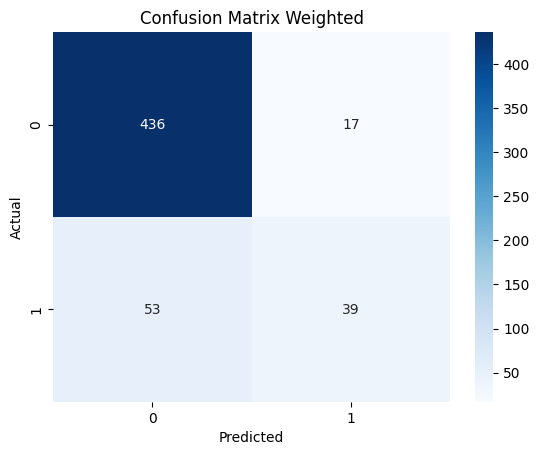

In [266]:
# Confusion matrix
cmw = confusion_matrix(y_test, y_pred_weighted)
sns.heatmap(cmw, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Weighted')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [267]:
import joblib

# Save Logistic Regression Model
joblib.dump(model, 'logistic_regression_model.pkl')

# Save Weighted Logistic Regression Model
joblib.dump(model_weighted, 'logistic_regression_weighted_model.pkl')

# Save XGBoost Model
joblib.dump(xgb_model, 'xgboost_model.pkl')

# Save Random Forest Model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Save Isolation Forest Model
joblib.dump(iso_forest, 'isolation_forest_model.pkl')

# Save SMOTE Balanced Model
joblib.dump(model_balanced, 'smote_balanced_model.pkl')


['smote_balanced_model.pkl']

In [270]:
from sklearn.preprocessing import StandardScaler
# Save the scaler
joblib.dump(scaler, '/content/scaler.pkl')  # Save to a file

['/content/scaler.pkl']

In [271]:
# Step 6: Feature Importance
# Logistic Regression coefficients
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feature_importance)



Feature Importance:
   Feature  Importance
0     VIX    2.520091
2  USGG3M    0.468419
1     DXY    0.128732


In [272]:
import pandas as pd

# Load the dataset
file_path = '/content/EWS.csv'  # Ensure this is the correct file path in Colab
data = pd.read_csv(file_path)

In [273]:
import joblib

# Load the model
model = joblib.load('/content/logistic_regression_model.pkl')

# Confirm model is loaded
print("Model loaded successfully!")

Model loaded successfully!


In [274]:
# Ensure the dataset is split the same way
train_size = int(0.5 * len(data))

X_train = data.iloc[:train_size, 1:]  # Exclude 'Y' column
y_train = data.iloc[:train_size, 0]  # First column for training

X_test = data.iloc[train_size:, 1:]  # Exclude 'Y' column
y_test = data.iloc[train_size:, 0]  # First column for testing

In [275]:
# Exclude the 'Y' column for predictions
X_test_features = X_test.copy()

In [276]:
# Convert 'Data' column to datetime
X_test_features['Data'] = pd.to_datetime(X_test_features['Data'])

# Extract numeric features
X_test_features['Year'] = X_test_features['Data'].dt.year
X_test_features['Month'] = X_test_features['Data'].dt.month
X_test_features['Day'] = X_test_features['Data'].dt.day

# Drop the original 'Data' column
X_test_features = X_test_features.drop(columns=['Data'])

In [277]:
from sklearn.preprocessing import StandardScaler

# Apply the scaler used during training
scaler = StandardScaler()

# Drop rows with missing values
X_test.dropna(inplace=True)
y_test = y_test[X_test.index]  # Align y_test with X_test

# Select the same features as used in training
selected_features = ['VIX','DXY','USGG3M']
X_test = X_test[selected_features]
X_test_scaled = scaler.fit_transform(X_test)  # Use the same scaler object

In [278]:
print(X_test.dtypes)


VIX       float64
DXY       float64
USGG3M    float64
dtype: object


In [280]:
# Generate predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Set the custom threshold
threshold = 0.7

# Apply the custom threshold
y_pred_threshold = (y_prob >= threshold).astype(int)  # Classify as 1 if probability >= threshold, else 0

# Compare predictions with actual values
comparison = pd.DataFrame({
    'Actual': y_test.values,       # Actual labels
    'Predicted': y_pred_threshold,      # Predicted labels with custom threshold

    'Probability': y_prob          # Prediction probabilities
})

# Display the first few rows of comparison
print(comparison.head())


   Actual  Predicted  Probability
0       0          1     0.723100
1       0          0     0.539146
2       0          0     0.341514
3       0          0     0.406568
4       0          0     0.421471


In [281]:
# Define investment strategy based on predictions
def investment_strategy(probability):
    if probability > 0.7:
        return "Move to safer investments (bonds, gold, cash)"
    elif probability < 0.3:
        return "Maintain high-risk portfolio (equities)"
    else:
        return "Diversify portfolio to balance risk"

# Apply the strategy to the test dataset
comparison['Strategy'] = comparison['Probability'].apply(investment_strategy)
print(comparison[['Actual', 'Predicted', 'Probability', 'Strategy']].head())


   Actual  Predicted  Probability  \
0       0          1     0.723100   
1       0          0     0.539146   
2       0          0     0.341514   
3       0          0     0.406568   
4       0          0     0.421471   

                                        Strategy  
0  Move to safer investments (bonds, gold, cash)  
1            Diversify portfolio to balance risk  
2            Diversify portfolio to balance risk  
3            Diversify portfolio to balance risk  
4            Diversify portfolio to balance risk  



Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       464
           1       0.47      0.52      0.49        92

    accuracy                           0.82       556
   macro avg       0.69      0.70      0.69       556
weighted avg       0.83      0.82      0.83       556


ROC-AUC Score: 0.834051724137931


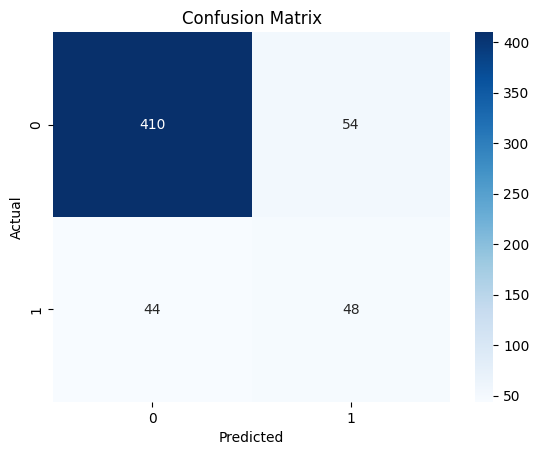

In [282]:
# Evaluate the model
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score:", roc_auc)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [283]:
!pip install yfinance
!pip install beautifulsoup4

In [300]:
import yfinance as yf
import pandas as pd


In [301]:
# Step 1: Fetch current or EOD prices
tickers = {
    'VIX': '^VIX',        # Volatility Index
    'DXY': 'DX-Y.NYB' ,    # US Dollar Index
    'USGG3M': '^IRX'      # 13 week treasury bill
}

# Fetch current prices
current_data = {}
for name, ticker in tickers.items():
    data = yf.Ticker(ticker)
    history = data.history(period="1d")  # Get EOD or latest price
    if not history.empty:
        current_data[name] = history['Close'].iloc[-1]  # Latest closing price
    else:
        current_data[name] = None  # Handle missing data

print("Current Prices:")
print(current_data)


Current Prices:
{'VIX': 19.940000534057617, 'DXY': 109.88400268554688, 'USGG3M': 4.2179999351501465}


In [302]:
# Step 3: Combine current prices and moving averages into input data
input_data = {
    'VIX': current_data['VIX'],
    'DXY': current_data['DXY'],
    'USGG3M': current_data['USGG3M']

}

# Handle missing values
for key, value in input_data.items():
    if value is None:
        print(f"Warning: Missing value for {key}")
        input_data[key] = 0  # Fallback to 0 or another default value

# Convert to DataFrame
input_df = pd.DataFrame([input_data])
print("\nInput Data for Prediction:")
print(input_df)


Input Data for Prediction:
         VIX         DXY  USGG3M
0  19.940001  109.884003   4.218


In [303]:
# Step 4: Predict using the trained model (load your model first)
import joblib

# Load the trained model (ensure the .pkl file is uploaded to Colab)
model = joblib.load('/content/logistic_regression_model.pkl')  # Update the file path if necessary
# Load the scaler
scaler = joblib.load('/content/scaler.pkl')

# Scale the input data using the loaded scaler
input_data_scaled = scaler.transform(input_df)

# Generate predictions
predicted_label = model.predict(input_data_scaled)  # Binary label prediction
predicted_prob = model.predict_proba(input_data_scaled)[:, 1]  # Probability of class 1

threshold=0.7
predicted_label = (predicted_prob >= threshold).astype(int)  # Classify as 1 if probability >= threshold

# Display results
print("\nPredicted Label (with threshold):", predicted_label[0])
print("Predicted Probability:", predicted_prob[0])



Predicted Label (with threshold): 0
Predicted Probability: 0.17322256223330518


In [305]:
import pandas as pd

# Assuming `input_data` is already a pandas DataFrame
# Add predictions and probabilities
input_df['Predicted'] = predicted_label  # Ensure `predicted_label` is not a NumPy array but a list or Series
input_df['Probability'] = predicted_prob  # Ensure `predicted_prob` is not a NumPy array but a list or Series

# Define investment strategy based on predictions
def investment_strategy(probability):
    if probability > 0.7:
        return "Move to safer investments (bonds, gold, cash)"
    elif probability < 0.3:
        return "Maintain high-risk portfolio (equities)"
    else:
        return "Diversify portfolio to balance risk"


# Apply the investment strategy
input_df['Strategy'] = input_df['Probability'].apply(investment_strategy)

# Display the updated DataFrame
print("\nPredictions and Investment Strategy:")
print(input_df[['VIX', 'DXY', 'USGG3M', 'Predicted', 'Probability', 'Strategy']])



Predictions and Investment Strategy:
         VIX         DXY  USGG3M  Predicted  Probability  \
0  19.940001  109.884003   4.218          0     0.173223   

                                  Strategy  
0  Maintain high-risk portfolio (equities)  
